## Estimating π using Monte Carlo Method
ChemMath 20191002 程式作業 #1
B05203008 化學四 廖哲宏

    Last Modified: 2019103
    Deadline: 20191016
    

In [136]:
# package install
import numpy as np
from scipy.spatial import distance_matrix as dmx
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


  * 考慮一個邊長為 1 的正方形 (二維)，以及一個半徑為 1 的四分之一圓：
        請嘗試看看，一百次、一千次、一萬次抽樣各三次，這九次分別把圓周率估計成多少。
        請嘗試在程式碼裡面使用函數以及迴圈的概念。
  * (非必要) 如果本來就會寫 Python 的話，可以練習用 scipy.spatial.distance_matrix，直接做個一億筆抽樣。

In [95]:
def piByArea(num):
    origin = np.array([[0,0]])
    sample = np.random.random([num, 2])
    dist = dmx(sample, origin)
    count = np.where(dist < 1)
    print ("sample size : {}, result pi = {}".format(num, len(count[0])*4/num))
    return sample

In [85]:
for num in [100, 1000, 10000, 100000000]: 
    for i in range(3):
        piByArea(num)

sample size : 100, result pi = 3.0
sample size : 100, result pi = 3.36
sample size : 100, result pi = 3.04
sample size : 1000, result pi = 3.144
sample size : 1000, result pi = 3.144
sample size : 1000, result pi = 3.2
sample size : 10000, result pi = 3.1648
sample size : 10000, result pi = 3.1468
sample size : 10000, result pi = 3.1304
sample size : 100000000, result pi = 3.14147348
sample size : 100000000, result pi = 3.14141576
sample size : 100000000, result pi = 3.14168432


 * 如果考慮邊長為 1 的正方體 (三維)，以及一個半徑為 1 的八分之一球體，情況會變成如何？
        為了避免你們忘記，球體體積 = 43πr3
        請嘗試看看，一百次、一千次、一萬次抽樣各三次，這九次分別把圓周率估計成多少。
        相同的，請嘗試在程式碼裡面使用函數以及迴圈的概念。
  

In [94]:
def piByVolume(num):
    origin = np.array([[0,0,0]])
    sample = np.random.random([num, 3])
    dist = dmx(sample, origin)
    count = np.where(dist < 1)
    print ("sample size : {}, result pi = {}".format(num, len(count[0])*6/num))
    return sample


In [88]:
for num in [100, 1000, 10000, 100000000]:
    for i in range(3):
        piByVolume(num)

sample size : 100, result pi = 3.3
sample size : 100, result pi = 3.36
sample size : 100, result pi = 3.36
sample size : 1000, result pi = 3.114
sample size : 1000, result pi = 3.126
sample size : 1000, result pi = 3.12
sample size : 10000, result pi = 3.183
sample size : 10000, result pi = 3.1218
sample size : 10000, result pi = 3.1182
sample size : 100000000, result pi = 3.14156574
sample size : 100000000, result pi = 3.14171028
sample size : 100000000, result pi = 3.14186862


* 如果可以的話，可以另外再開一個文本區塊，然後寫下一點點觀察。



## 觀察 

    1. 精準度隨著sample size上升而上升（可以預期）
    
    2. 用球體體積計算之 值相對誤差較大，因其相同 sample size 下, 在立體空間中分佈較為稀疏，故誤差會比較明顯(下圖為1000點分佈)。

sample size : 10000, result pi = 3.1652


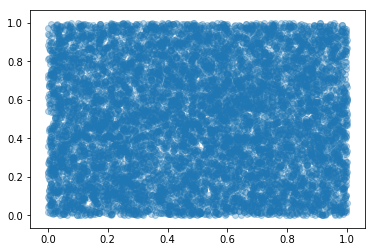

In [133]:
plot1 = piByArea(10000)

plt.figure()
plt.scatter(plot1[:, 0], plot1[:, 1], alpha=0.3)

sample size : 10000, result pi = 3.1428


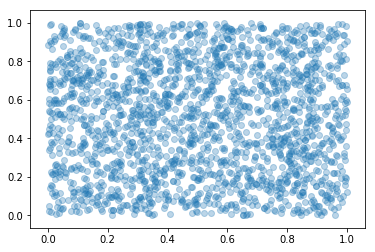

In [134]:
plot2 = piByVolume(10000)
idx = np.where(np.abs(plot2[:, 2]-0.5) < 0.1)

plt.figure()
plt.scatter(plot2[idx, 0], plot2[idx, 1], alpha=0.3)
